In [1]:
# os module to handle file paths and directories
import os
# OpenCV library for image processing tasks
import cv2
# Random module for generating random numbers
import random
# Pandas library for data manipulation and analysis
import pandas as pd
# Numpy library for numerical computations
import numpy as np
# Matplotlib library for data visualization
import matplotlib.pyplot as plt
# Seaborn library for statistical data visualization
import seaborn as sns
# TensorFlow library for building and training neural networks
import tensorflow as tf
#  Keras module from TensorFlow for building neural network models
from tensorflow import keras
# Layers module from Keras for defining different types of layers in a neural network
from tensorflow.keras import layers
# Sequential class from Keras for creating sequential neural network models
from tensorflow.keras.models import Sequential
# Specific layers from Keras for building the neural network architecture
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
# TensorBoard callback from Keras for monitoring training progress
from tensorflow.keras.callbacks import TensorBoard
# Classification_report function from scikit-learn for evaluating classification models
from sklearn.metrics import classification_report


# Loading the Data

In [2]:
# Function to load and print shape of images
def print_image_shapes(image_paths):
    for img_path in image_paths:
        img = cv2.imread(img_path)
        if img is not None:
            print("Image shape:", img.shape)
        else:
            print("Error: Unable to load image at path:", img_path)

# Directories for train, test, and validation data
train_directory = "D:\JP CERTIFICATES\IITK\Course summerterm\DL\mask_data\Face Mask Dataset\Train"
test_directory = "D:\JP CERTIFICATES\IITK\Course summerterm\DL\mask_data\Face Mask Dataset\Test"
validation_directory = "D:\JP CERTIFICATES\IITK\Course summerterm\DL\mask_data\Face Mask Dataset\Validation"

# Load train data
train_filepath = []
train_label = []

folds_train = os.listdir(train_directory)

for fold in folds_train:
    f_path = os.path.join(train_directory, fold)
    imgs = os.listdir(f_path)
    for img in imgs:
        img_path = os.path.join(f_path, img)
        train_filepath.append(img_path)
        train_label.append(fold)

# Concatenate data paths with labels for train data
train_file_path_series = pd.Series(train_filepath, name='filepath')
train_label_path_series = pd.Series(train_label, name='label')
df_train = pd.concat([train_file_path_series, train_label_path_series], axis=1)

# Load test data
test_filepath = []
test_label = []

folds_test = os.listdir(test_directory)

for fold in folds_test:
    f_path = os.path.join(test_directory, fold)
    imgs = os.listdir(f_path)
    for img in imgs:
        img_path = os.path.join(f_path, img)
        test_filepath.append(img_path)
        test_label.append(fold)

# Concatenate data paths with labels for test data
test_file_path_series = pd.Series(test_filepath, name='filepath')
test_label_path_series = pd.Series(test_label, name='label')
df_test = pd.concat([test_file_path_series, test_label_path_series], axis=1)

# Load validation data
validation_filepath = []
validation_label = []

folds_validation = os.listdir(validation_directory)

for fold in folds_validation:
    f_path = os.path.join(validation_directory, fold)
    imgs = os.listdir(f_path)
    for img in imgs:
        img_path = os.path.join(f_path, img)
        validation_filepath.append(img_path)
        validation_label.append(fold)

# Concatenate data paths with labels for validation data
validation_file_path_series = pd.Series(validation_filepath, name='filepath')
validation_label_path_series = pd.Series(validation_label, name='label')
df_validation = pd.concat([validation_file_path_series, validation_label_path_series], axis=1)


Rescaling layer is defined using layers.Rescaling from Keras. It scales the pixel values of the images in the datasets to the range `[0, 1]`.

The code then loads the train, validation, and test datasets from their respective directories using keras.utils.image_dataset_from_directory. The datasets are configured with batch size of `32`, image size of `(224, 224)`, and label mode set to 'binary' (assuming there are multiple classes). The train and validation datasets are further split into training and validation subsets based on the specified validation split ratio.

After loading the datasets, the rescaling layer is applied to each dataset using the map function, which rescales the pixel values of the images in the datasets.

# Preprocessing the Data

In [3]:
# Define rescaling layer
rescale = layers.Rescaling(1./255)

# Load train dataset with rescaling
train_ds = keras.utils.image_dataset_from_directory(
    directory="D:\JP CERTIFICATES\IITK\Course summerterm\DL\mask_data\Face Mask Dataset\Train",
    batch_size=32,
    image_size=(224, 224),
    validation_split=0.2,
    subset="training",
    seed=123,
    label_mode='categorical',  # Assuming you have multiple classes
)
train_ds = train_ds.map(lambda x, y: (rescale(x), y))  # Apply rescaling

# Load validation dataset with rescaling
validation_ds = keras.utils.image_dataset_from_directory(
    directory="D:\JP CERTIFICATES\IITK\Course summerterm\DL\mask_data\Face Mask Dataset\Validation",
    batch_size=32,
    image_size=(224, 224),
    validation_split=0.2,
    subset="validation",
    seed=123,
    label_mode='categorical',  # Assuming you have multiple classes
)
validation_ds = validation_ds.map(lambda x, y: (rescale(x), y))  # Apply rescaling

# Load test dataset with rescaling
test_ds = keras.utils.image_dataset_from_directory(
    directory="D:\JP CERTIFICATES\IITK\Course summerterm\DL\mask_data\Face Mask Dataset\Test",
    batch_size=32,
    image_size=(224, 224),
    label_mode='categorical',  # Assuming you have multiple classes
    shuffle=False,
)
test_ds = test_ds.map(lambda x, y: (rescale(x), y))  # Apply rescaling


Found 10000 files belonging to 2 classes.
Using 8000 files for training.
Found 800 files belonging to 2 classes.
Using 160 files for validation.
Found 992 files belonging to 2 classes.


Creates `8` images with mask and `8` without mask a figure with 4x4 subplots.
It loops through the sampled images with masks, reads each image using OpenCV (cv2), converts the image to RGB color space, and displays the image in the corresponding subplot with a title indicating `"With Mask"` and `"Without Mask"`.


# Visualizing Train Images

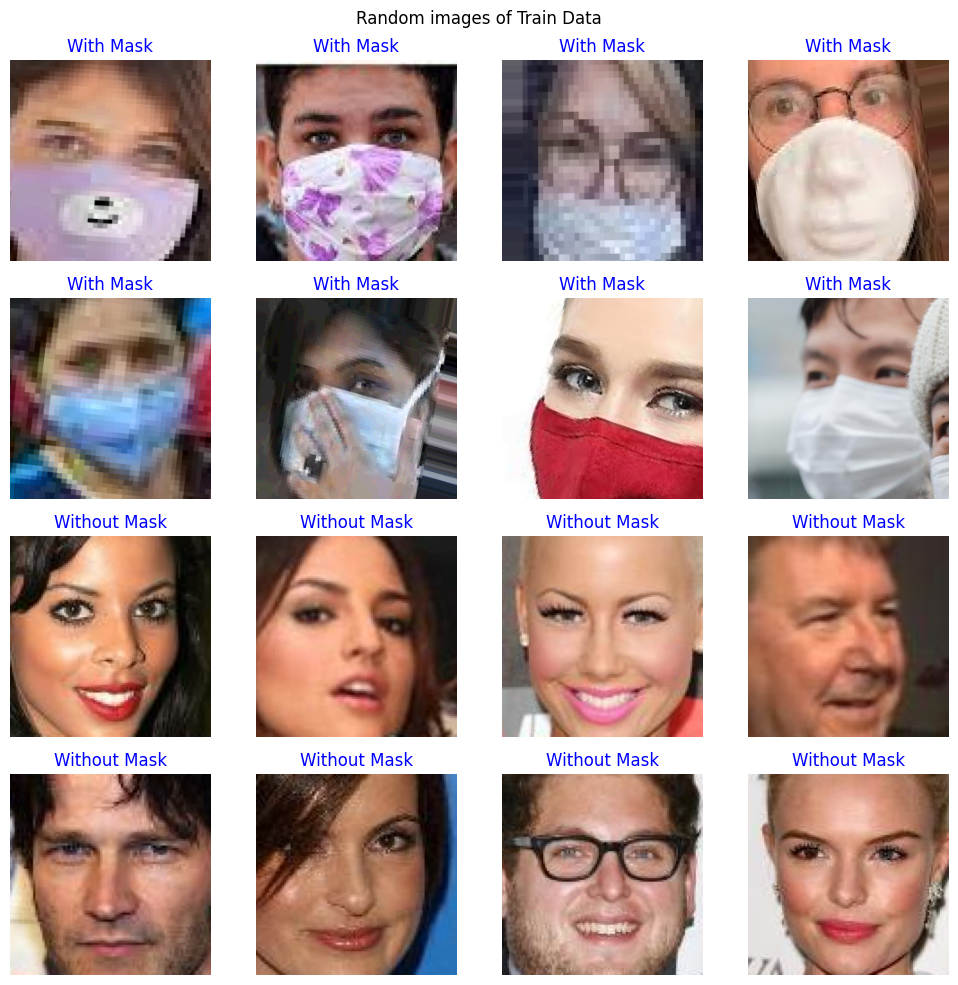

In [4]:
# Directory paths for images with mask and without mask
with_mask_path = "D:\JP CERTIFICATES\IITK\Course summerterm\DL\mask_data\Face Mask Dataset\Train\WithMask"
without_mask_path = "D:\JP CERTIFICATES\IITK\Course summerterm\DL\mask_data\Face Mask Dataset\Train\WithoutMask"

# Function to sample images from a directory
def sample_images(directory, num_samples):
    images = [os.path.join(directory, file) for file in os.listdir(directory)]
    return random.sample(images, min(num_samples, len(images)))

# Sample images from each category
with_mask_img_paths = sample_images(with_mask_path, 8)
without_mask_img_paths = sample_images(without_mask_path, 8)

# Load and display images in subplots
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

# Loop through images with mask
for i, img_path in enumerate(with_mask_img_paths):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert image to RGB
    axes[i//4, i%4].imshow(img)
    axes[i//4, i%4].set_title("With Mask",color= 'blue')
    axes[i//4, i%4].axis('off')

# Loop through images without mask
for i, img_path in enumerate(without_mask_img_paths):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert image to RGB
    axes[2+i//4, i%4].imshow(img)
    axes[2+i//4, i%4].set_title("Without Mask",color='blue')
    axes[2+i//4, i%4].axis('off')

plt.suptitle('Random images of Train Data')
plt.tight_layout()
plt.show()


An input layer is defined with a shape of `(224, 224, 3)` .
A sequential model is defined consisting of multiple layers: three convolutional layers with `32` filters and `3x3` kernel size, followed by `max pooling` layers; a `flatten layer` to convert the 2D data to 1D; a dropout layer with a dropout rate of 0.5; and an output layer with 1 unit and `softmax` activation.

# Count of Train Label

C:\Users\JAYA PRAKASH\AppData\Local\Temp\ipykernel_29000\1850045341.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")


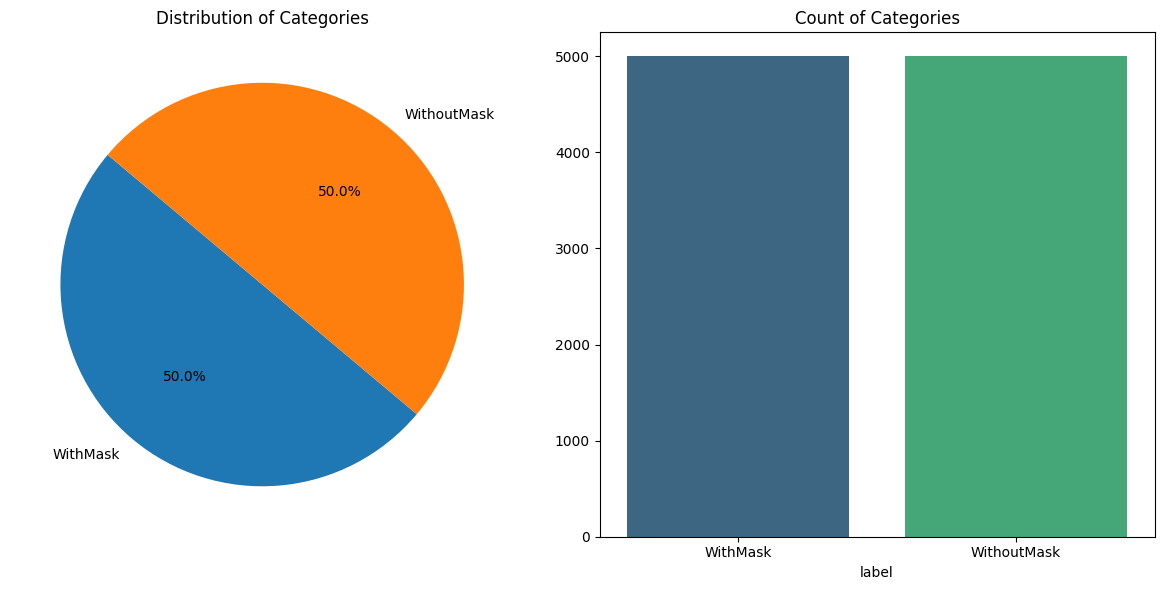

In [5]:
# Count the occurrences of each category in the 'category' column
count = df_train['label'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Plot pie chart on the first subplot
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Categories')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Count of Test Label


C:\Users\JAYA PRAKASH\AppData\Local\Temp\ipykernel_29000\852637156.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")


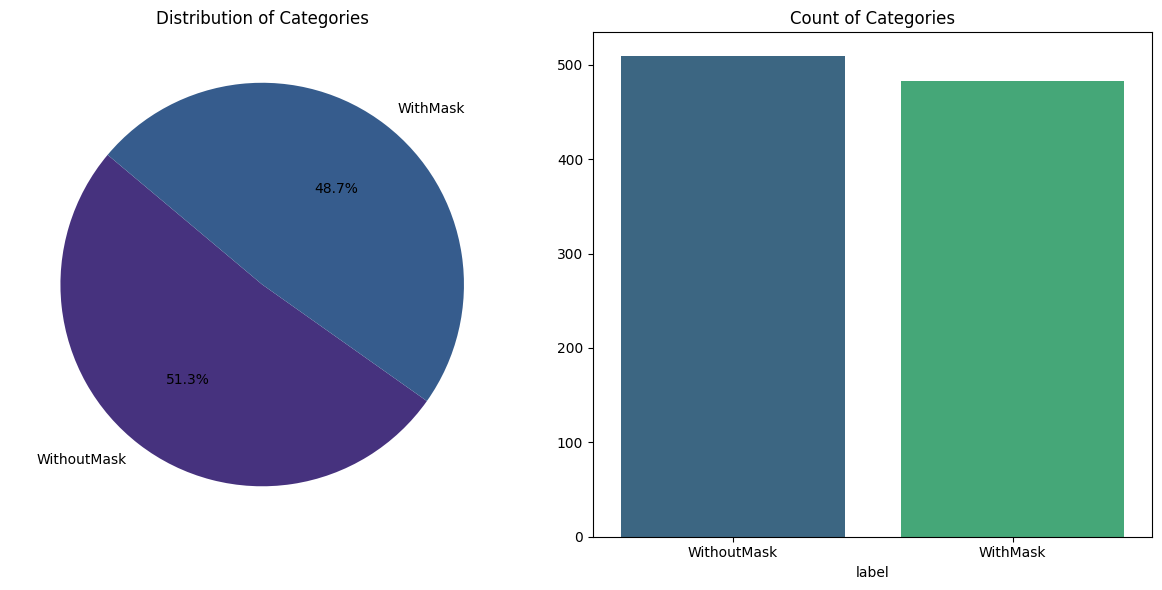

In [6]:
# Count the occurrences of each category in the 'category' column
count = df_test['label'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Plot pie chart on the first subplot
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Categories')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


# Build the Model

In [7]:
# Define input layer
input_layer = tf.keras.layers.Input(shape=(224, 224, 3))

# Define model architecture
model = tf.keras.models.Sequential([
    input_layer,
    # Convolutional layer with 32 filters and 3x3 kernel size, using ReLU activation
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    # Max pooling layer
    tf.keras.layers.MaxPooling2D(),
    # Convolutional layer with 32 filters and 3x3 kernel size, using ReLU activation
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    # Max pooling layer
    tf.keras.layers.MaxPooling2D(),
    # Convolutional layer with 32 filters and 3x3 kernel size, using ReLU activation
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    # Max pooling layer
    tf.keras.layers.MaxPooling2D(),
    # Flatten layer to convert 2D data to 1D
    tf.keras.layers.Flatten(),
    # Dropout Layer
    tf.keras.layers.Dropout(0.5),
    # Output layer with 1 units (for 10 classes) and softmax activation
    tf.keras.layers.Dense(2, activation='softmax'),
])



# Summary of Model

In [8]:
# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 32)        0

The model is compiled with the Adam optimizer, categorical cross-entropy loss function, and accuracy metric. This prepares the model for training by specifying the optimization algorithm, the loss function to minimize during training, and the metric to evaluate the model's performance.


# Compile the Model

In [9]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

EarlyStopping callback is defined with a patience of `5` and restore_best_weights set to True. The model is then trained using the fit() function with the specified training and validation datasets, for a total of `5` epochs. The EarlyStopping callback is included as a callback during training to monitor the validation loss and control early stopping behavior, and the training history is stored in the history variable.


# Fit the Model

In [10]:
# Define early stopping callback
from tensorflow.keras.callbacks import EarlyStopping
# Define early stopping callback
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

# Fit the model with callbacks
history = model.fit(train_ds,
                    validation_data=validation_ds,
                    epochs=5,
                    callbacks=[early_stopping])


Epoch 1/5
250/250 [==============================] - 269s 1s/step - loss: 0.1653 - accuracy: 0.9337 - val_loss: 0.1286 - val_accuracy: 0.9625
Epoch 2/5
250/250 [==============================] - 452s 2s/step - loss: 0.0808 - accuracy: 0.9728 - val_loss: 0.1152 - val_accuracy: 0.9688
Epoch 3/5
250/250 [==============================] - 449s 2s/step - loss: 0.0551 - accuracy: 0.9810 - val_loss: 0.0752 - val_accuracy: 0.9625
Epoch 4/5
250/250 [==============================] - 165s 659ms/step - loss: 0.0509 - accuracy: 0.9814 - val_loss: 0.0530 - val_accuracy: 0.9750
Epoch 5/5
250/250 [==============================] - 166s 662ms/step - loss: 0.0367 - accuracy: 0.9889 - val_loss: 0.0222 - val_accuracy: 0.9937




# Evaluate the Model


In [11]:

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_ds) 

# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


31/31 [==============================] - 6s 190ms/step - loss: 0.0509 - accuracy: 0.9839
Test Loss: 0.050944965332746506
Test Accuracy: 0.9838709831237793



# History Plot

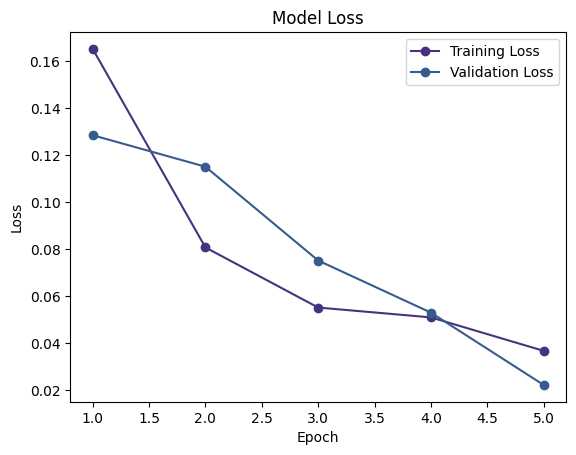

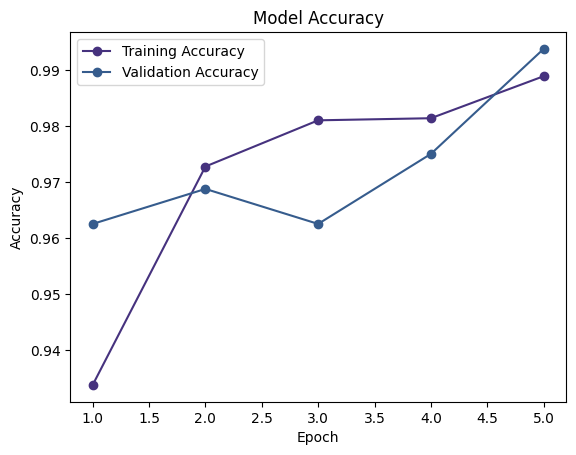

In [12]:
import matplotlib.pyplot as plt

# Define epochs
epochs = range(1, len(history.history['loss']) + 1)

# Plot training & validation loss
plt.plot(epochs, history.history['loss'], label='Training Loss', marker='o')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training & validation accuracy
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
